# Exercises for Practice 

## Exercise 01
Create a map of all the counties in New York. Be sure to title the map and to fill in each county with the total number of COVID19 cases they have seen to date. In addition, draw county borders in white. Use `theme_map()` and make sure the legend is at the bottom. **Hint:** You will need to calculate the total number of cases per county and then join the resulting file with the counties data file.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
readr::read_csv(
    "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
    ) -> covid 

Rows: 1956348 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): county, state, fips
dbl  (2): cases, deaths
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
covid %>%
    head()

date       county    state      fips  cases deaths
1 2020-01-21 Snohomish Washington 53061 1     0     
2 2020-01-22 Snohomish Washington 53061 1     0     
3 2020-01-23 Snohomish Washington 53061 1     0     
4 2020-01-24 Cook      Illinois   17031 1     0     
5 2020-01-24 Snohomish Washington 53061 1     0     
6 2020-01-25 Orange    California 06059 1     0

In [4]:
covid %>%
    filter(state == "New York") -> ny

In [9]:
ny %>%
    group_by(county, fips) %>%
    summarize(
        total_cases = sum(cases, na.rm = TRUE)
        ) -> nydf

`summarise()` has grouped output by 'county'. You can override using the `.groups` argument.



In [10]:
load("data/counties.RData")

In [11]:
head(counties)

GEOID NAME                     variable   estimate moe
1 01001 Autauga County, Alabama  B01001_001 55380    NA 
2 01009 Blount County, Alabama   B01001_001 57681    NA 
3 01017 Chambers County, Alabama B01001_001 33660    NA 
4 01021 Chilton County, Alabama  B01001_001 44055    NA 
5 01033 Colbert County, Alabama  B01001_001 54771    NA 
6 01045 Dale County, Alabama     B01001_001 49277    NA 
  geometry                      
1 MULTIPOLYGON (((1269841 -13...
2 MULTIPOLYGON (((1240383 -11...
3 MULTIPOLYGON (((1382944 -12...
4 MULTIPOLYGON (((1257515 -12...
5 MULTIPOLYGON (((1085910 -10...
6 MULTIPOLYGON (((1382203 -13...

In [12]:
counties %>%
    inner_join(
        nydf,
        by = c("GEOID" = "fips")
    ) -> nyc_df

In [13]:
head(nyc_df)

GEOID NAME                        variable   estimate moe county    
1 36003 Allegany County, New York   B01001_001  46688   NA  Allegany  
2 36021 Columbia County, New York   B01001_001  60371   NA  Columbia  
3 36037 Genesee County, New York    B01001_001  57808   NA  Genesee   
4 36043 Herkimer County, New York   B01001_001  62057   NA  Herkimer  
5 36057 Montgomery County, New York B01001_001  49302   NA  Montgomery
6 36069 Ontario County, New York    B01001_001 109511   NA  Ontario   
  total_cases geometry                      
1 1251341     MULTIPOLYGON (((1775122 -95...
2 1481169     MULTIPOLYGON (((2107162 157...
3 1912937     MULTIPOLYGON (((1730097 -66...
4 1843650     MULTIPOLYGON (((1981466 693...
5 1464752     MULTIPOLYGON (((2048630 103...
6 2576695     MULTIPOLYGON (((1849295 151...

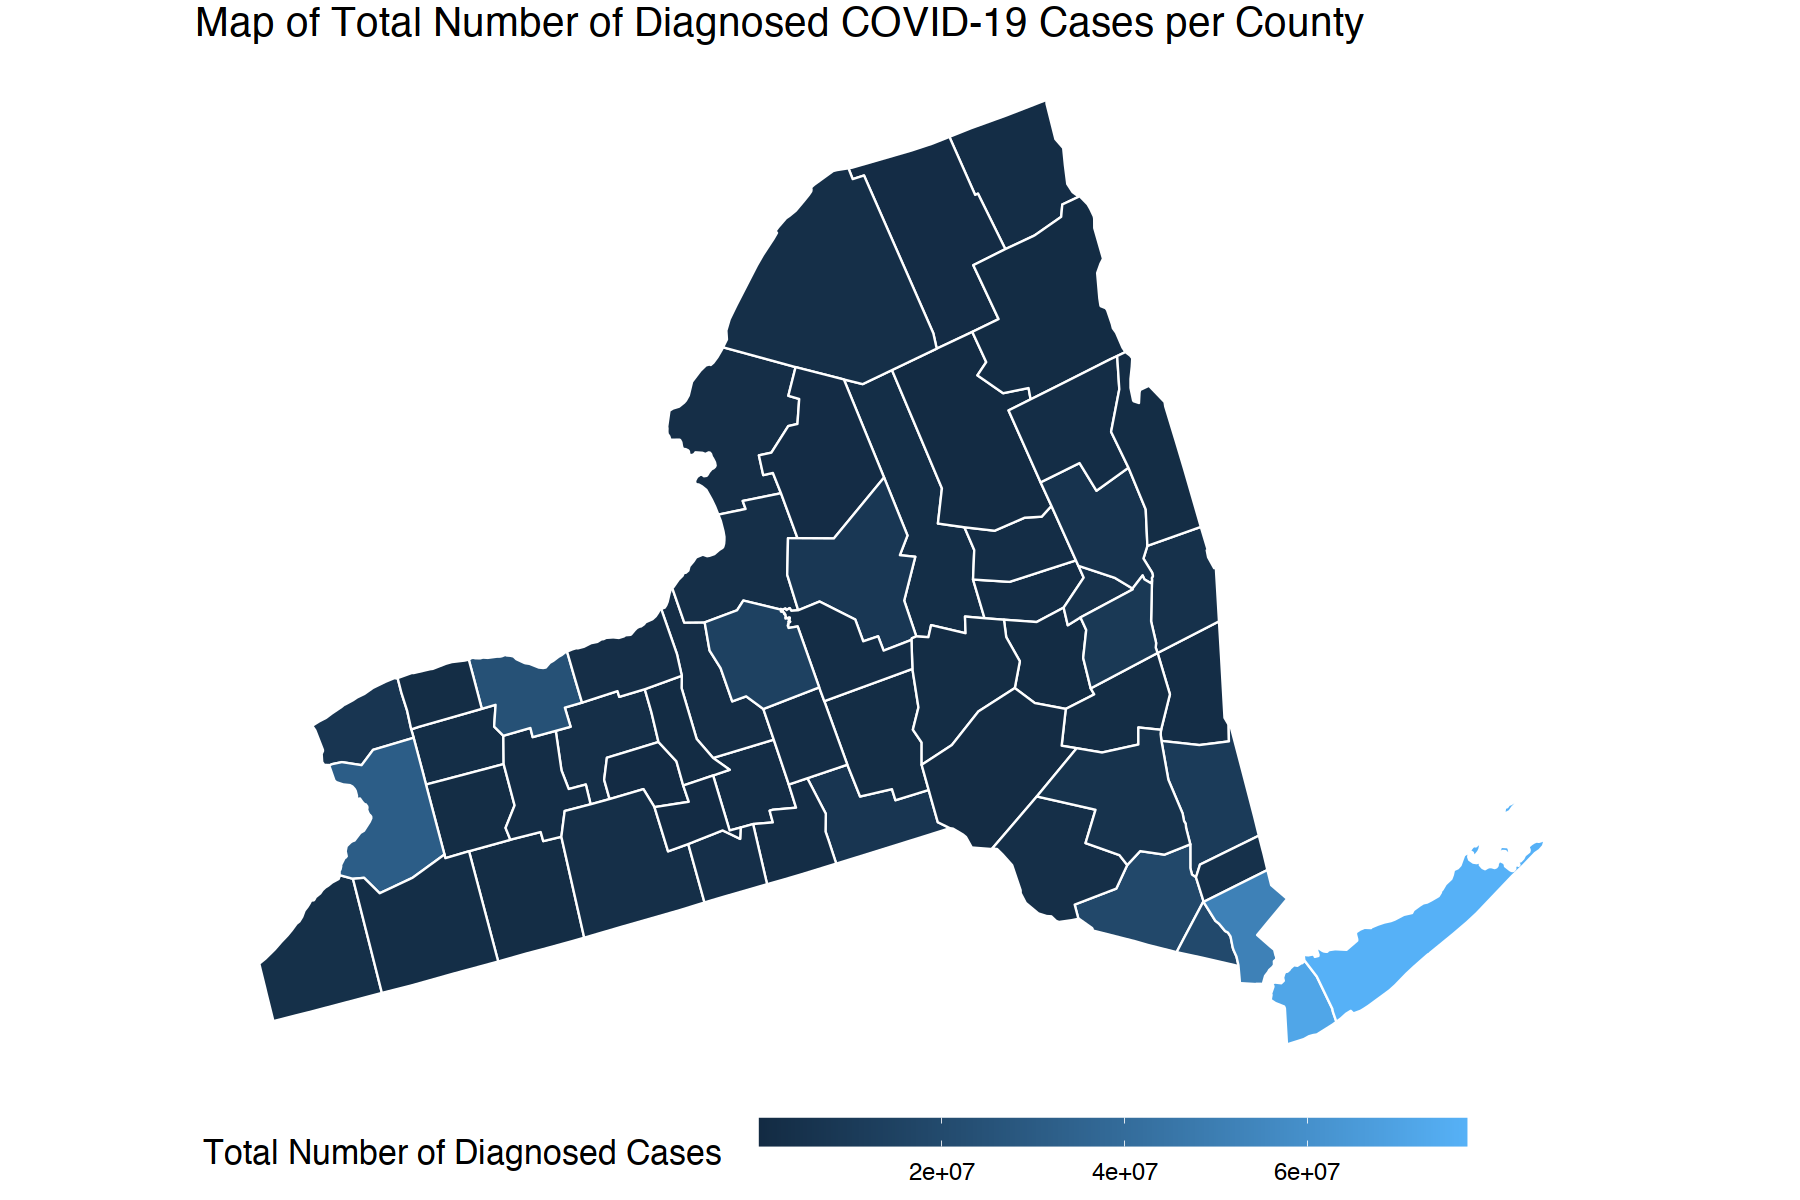

In [17]:
options(repr.plot.width = 15, repr.plot.height = 10)

nyc_df %>%
    ggplot() +
    geom_sf(
        aes(fill = total_cases),
        color = "white"
    ) +
    ggthemes::theme_map() +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.key.width = unit(3, 'cm'),
        title = element_text(size = 20, face = "bold")
        ) +
    labs(
        title = "Map of Total Number of Diagnosed COVID-19 Cases per County",
        fill = "Total Number of Diagnosed Cases")

## Exercise 02 
Run the following code chunk to load data on the murder, assault and rape rates per 100,000 persons. `Urbanpop` is the percent of the state population that lives in an urban area. 

In [19]:
data(USArrests)
names(USArrests)
USArrests$statename <- rownames(USArrests)

head(USArrests)

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

Murder Assault UrbanPop Rape statename 
Alabama    13.2   236     58       21.2 Alabama   
Alaska     10.0   263     48       44.5 Alaska    
Arizona     8.1   294     80       31.0 Arizona   
Arkansas    8.8   190     50       19.5 Arkansas  
California  9.0   276     91       40.6 California
Colorado    7.9   204     78       38.7 Colorado

Now create a state-level map of the 50 states making sure to use `UrbanPop` to fill each state. Title the map and place the legend at the bottom. 

In [20]:
load("data/states.RData")

In [21]:
head(states)

GEOID NAME                 variable   estimate moe
1 04    Arizona              B01001_001  7050299 NA 
2 05    Arkansas             B01001_001  2999370 NA 
3 06    California           B01001_001 39283497 NA 
4 08    Colorado             B01001_001  5610349 NA 
5 09    Connecticut          B01001_001  3575074 NA 
6 11    District of Columbia B01001_001   692683 NA 
  geometry                      
1 MULTIPOLYGON (((-1111066 -8...
2 MULTIPOLYGON (((557903.1 -1...
3 MULTIPOLYGON (((-1853480 -9...
4 MULTIPOLYGON (((-613452.9 -...
5 MULTIPOLYGON (((2226838 519...
6 MULTIPOLYGON (((1960720 -41...

In [22]:
states %>%
    left_join(
        USArrests,
        by = c("NAME" = "statename")
    ) -> statemap

head(statemap)

GEOID NAME                 variable   estimate moe Murder Assault UrbanPop
1 04    Arizona              B01001_001  7050299 NA  8.1    294     80      
2 05    Arkansas             B01001_001  2999370 NA  8.8    190     50      
3 06    California           B01001_001 39283497 NA  9.0    276     91      
4 08    Colorado             B01001_001  5610349 NA  7.9    204     78      
5 09    Connecticut          B01001_001  3575074 NA  3.3    110     77      
6 11    District of Columbia B01001_001   692683 NA   NA     NA     NA      
  Rape geometry                      
1 31.0 MULTIPOLYGON (((-1111066 -8...
2 19.5 MULTIPOLYGON (((557903.1 -1...
3 40.6 MULTIPOLYGON (((-1853480 -9...
4 38.7 MULTIPOLYGON (((-613452.9 -...
5 11.1 MULTIPOLYGON (((2226838 519...
6   NA MULTIPOLYGON (((1960720 -41...

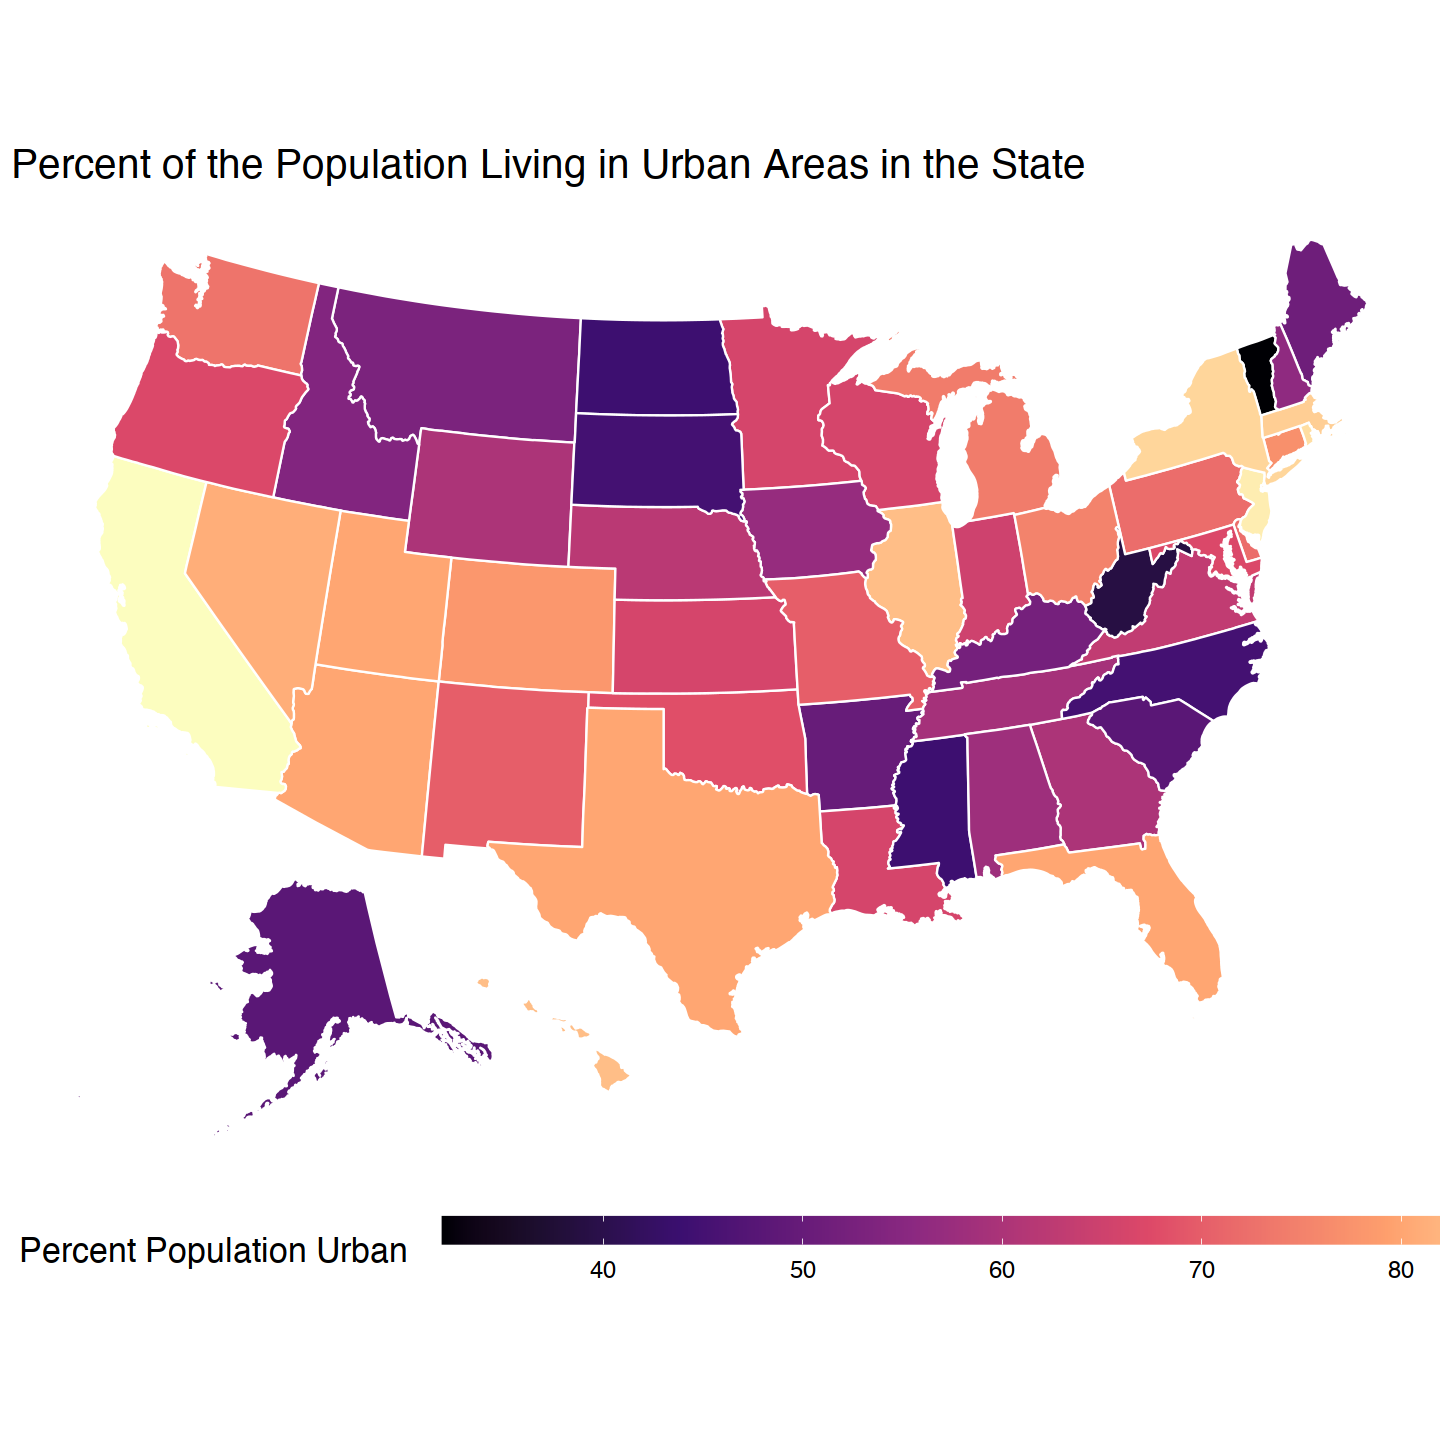

In [23]:
options(repr.plot.width = 12, repr.plot.height = 12)

statemap %>%
    ggplot() +
    geom_sf(
        aes(fill = UrbanPop),
        color = "white"
        ) +
  ggthemes::theme_map() +
  theme(
      legend.position = "bottom",
      legend.text = element_text(size = 14),
      legend.key.width = unit(5, 'cm'),
      title = element_text(size = 20, face = "bold")
  ) +
  labs(
    title = "Percent of the Population Living in Urban Areas in the State",
    fill = "Percent Population Urban"
        ) +
  scale_fill_viridis_c(option = "magma")
    

## Exercise 03

Use the `USArrests` data to draw scatterplots of (a) `Murder` versus `UrbanPop`, (b) `Assault` versus `UrbanPop`, and (c) `Rape` versus `UrbanPop`. Save each of these scatterplots by name and then use `patchwork` to create a single canvas that includes all three plots. Make sure you label the x-axis, y-axis, and title each plot. 

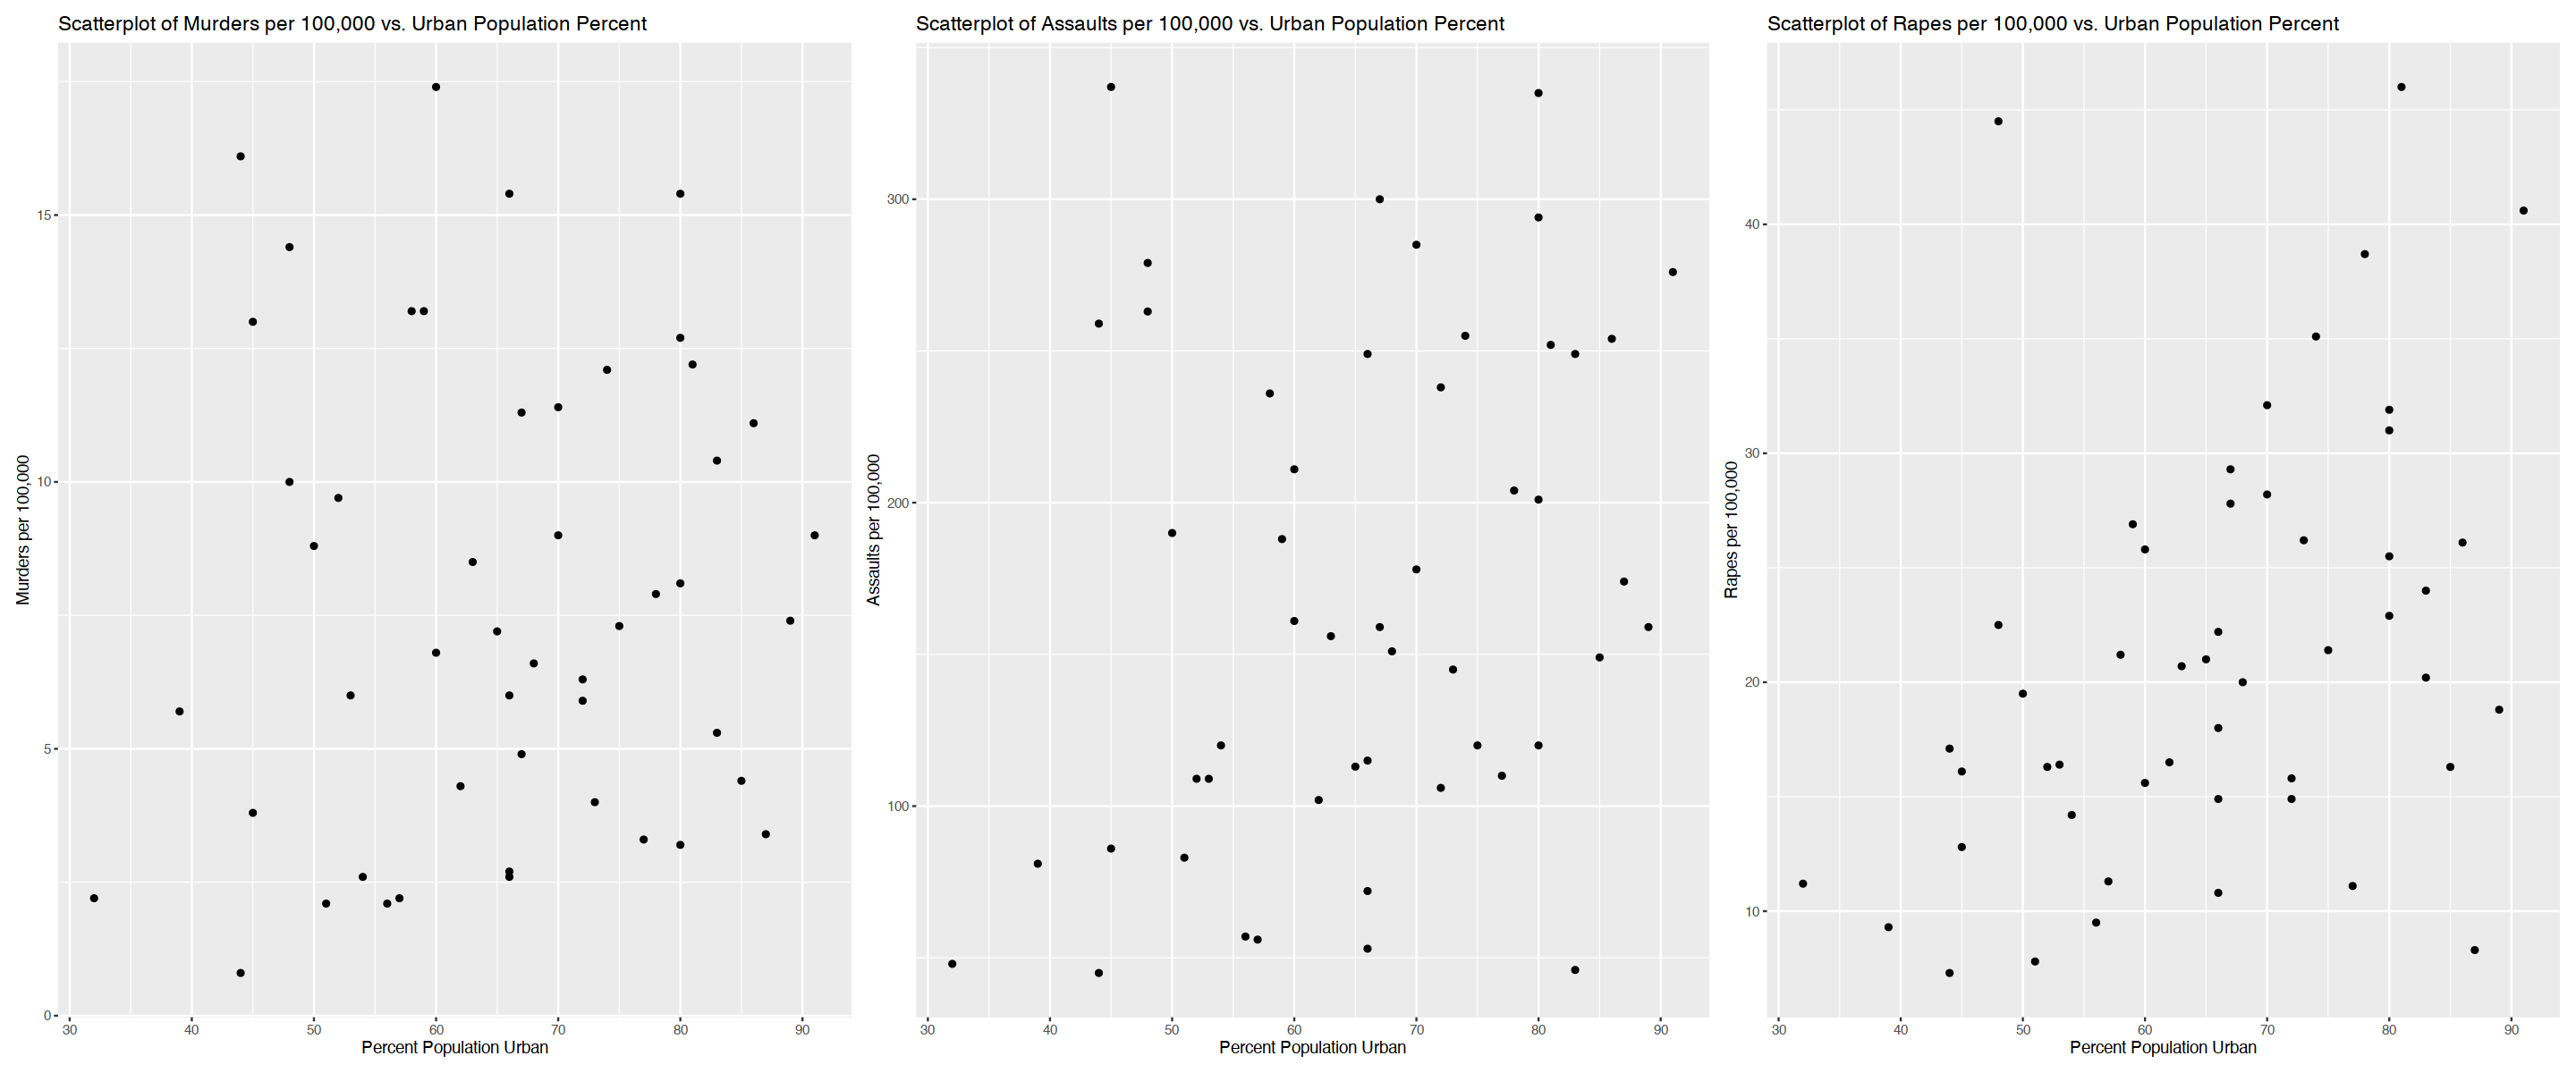

In [24]:
ggplot(
    data = USArrests,
    aes(
        x = UrbanPop,
        y = Murder
        )
    ) +
    geom_point() +
    labs(
        x = "Percent Population Urban",
        y = "Murders per 100,000",
        title = "Scatterplot of Murders per 100,000 vs. Urban Population Percent") -> p1

ggplot(
    data = USArrests,
    aes(
        x = UrbanPop,
        y = Assault
        )
    ) +
    geom_point() +
    labs(
        x = "Percent Population Urban",
        y = "Assaults per 100,000",
        title = "Scatterplot of Assaults per 100,000 vs. Urban Population Percent") -> p2

ggplot(
    data = USArrests,
    aes(
        x = UrbanPop,
        y = Rape
        )
    ) +
    geom_point() +
    labs(
        x = "Percent Population Urban",
        y = "Rapes per 100,000",
        title = "Scatterplot of Rapes per 100,000 vs. Urban Population Percent") -> p3


library(patchwork)

options(repr.plot.width = 24, repr.plot.height = 10)

p1+ p2 + p3

## Exercise 04 

Now create `highcharter` versions of each of the three scatterplots you created in Exercise (3) above. You should end up with three scatterplots, each on its own canvas. 

In [25]:
library(highcharter)

hchart(
    USArrests, 
    "scatter", 
    hcaes(
        x = UrbanPop, 
        y = Murder
        ),
    name = "Murders per 100,000 vs Percent Population Urban",
    showInLegend = TRUE
    ) 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Highcharts (www.highcharts.com) is a Highsoft software product which is

not free for commercial and Governmental use



HTML widgets cannot be represented in plain text (need html)

In [26]:
hchart(
    USArrests, 
    "scatter", 
    hcaes(
        x = UrbanPop, 
        y = Assault
        ),
    name = "Assaults per 100,000 vs Percent Population Urban",
    showInLegend = TRUE
    ) 

HTML widgets cannot be represented in plain text (need html)

In [27]:
hchart(
    USArrests, 
    "scatter", 
    hcaes(
        x = UrbanPop, 
        y = Rape
        ),
    name = "Rapes per 100,000 vs Percent Population Urban",
    showInLegend = TRUE
    ) 

HTML widgets cannot be represented in plain text (need html)